# Data Preprocessing Tools

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Importing the Dataset

- Country, Age and Salary are part of the matrix of features 
- The last column (Purchased) is the dependent variable vector
- The matrix of features is used to predict the dependant variable vector

In [2]:
dataset = pd.read_csv('Data.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

Some of the cells do not have data

In [3]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [4]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


## Taking Care of Missing Data

- Feature Scaling - scaling all features to ensure they all take values in same scale
- Prevents one feature to dominate the other, which therefore would be neglected by the model
- Scaling is applied after split, doing it before would cause observations from the test set (future set only for testing) on the training set 
- We can remove the rows where the cells do not have data which works for very large datasets but sometimes it is not possible.
- In this case, the empty cells are replaced with the average
  - The Age and Salary columns will be processed

In [5]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [6]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 63777.77777777778]
 ['France' 35.0 58000.0]
 ['Spain' 38.77777777777778 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


## Encoding Categorical Data

- Encoding strings into numerical formats allows machine learning algorithms to process and learn from categorical data effectively, as they require numerical input to perform calculations and make predictions.
- Machine learning algorithms operate on mathematical principles that require numerical inputs; strings, being non-numeric, cannot be directly used in mathematical computations, making it essential to convert them into a format the algorithms can work with.


- We cannot assign simple values to each country (1 for France, 2 for Spain. etc) because this could represent a numerical order or relationship between each country which there isn't
- Instead we can use binary vectors for each country using One-Hot Encoding

### Encoding the Independent Variable

In [7]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [8]:
print(X)

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding the Dependent Variable

- Because the labels are yes and no, they can be encoded into 1 and 0 as they are binary

In [9]:
le = LabelEncoder()
y = le.fit_transform(y)

In [10]:
print(y)

[0 1 0 0 1 1 0 1 0 1]


## Splitting the Dataset into the Training Set and Test Set

- The dataset is split into training set and test set
- The training set is used to train the model
- The test set is used to very the models performance on unseen data

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [12]:
print(X_train)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]


In [13]:
print(X_test)

[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


In [14]:
print(y_train)

[0 1 0 0 1 1 0 1]


In [15]:
print(y_test)

[0 1]


## Feature Scaling

- Feature scaling normalizes the range of input features, ensuring no single feature dominates the model's learning process due to its scale, leading to faster convergence and improved accuracy.
- Feature scaling is applied after splitting the dataset
- The scaling from the training set is applied to the test set
- Otherwise, the test set would be leaked into the training set  

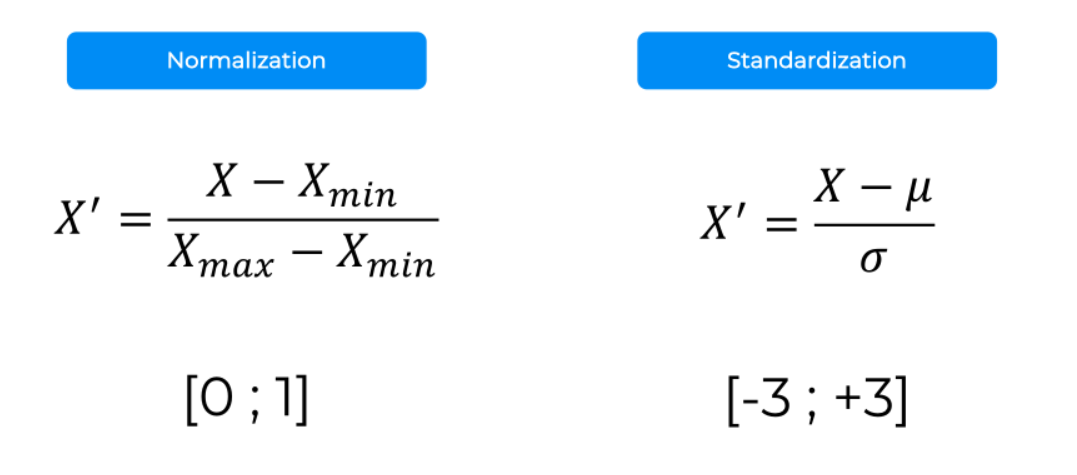

In [16]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [17]:
print(X_train)

[[-0.77459667 -0.57735027  1.29099445 -0.19159184 -1.07812594]
 [-0.77459667  1.73205081 -0.77459667 -0.01411729 -0.07013168]
 [ 1.29099445 -0.57735027 -0.77459667  0.56670851  0.63356243]
 [-0.77459667 -0.57735027  1.29099445 -0.30453019 -0.30786617]
 [-0.77459667 -0.57735027  1.29099445 -1.90180114 -1.42046362]
 [ 1.29099445 -0.57735027 -0.77459667  1.14753431  1.23265336]
 [-0.77459667  1.73205081 -0.77459667  1.43794721  1.57499104]
 [ 1.29099445 -0.57735027 -0.77459667 -0.74014954 -0.56461943]]


In [18]:
print(X_test)

[[-0.77459667  1.73205081 -0.77459667 -1.46618179 -0.9069571 ]
 [ 1.29099445 -0.57735027 -0.77459667 -0.44973664  0.20564034]]
